In [ ]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd

import pickle
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

import keras

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
file_to_class = {'lc_classnum_PISN_old.pickle': 'PISN', 'lc_classnum_ILOT_old.pickle': 'ILOT', 'lc_classnum_CART_old.pickle': 'CaRT',
'lc_classnum_Kilonova.pickle': 'KNe', 'lc_classnum_uLens-BSR.pickle': 'uLens-BSR', 'lc_classnum_TDE.pickle': 'TDE', 'lc_classnum_SLSN-I.pickle': 'SLSN-I', 'lc_classnum_Ic.pickle': 'SNIc', 'lc_classnum_Ic-BL.pickle': 'SNIc-BL', 'lc_classnum_II.pickle': 'SNII', 'lc_classnum_IIb.pickle': 'SNIIb', 'lc_classnum_Ib.pickle': 'SNIb', 'lc_classnum_IIn.pickle': 'SNIIn', 'lc_classnum_Ia-91bg.pickle': 'SNIa-91bg', 'lc_classnum_Iax.pickle': 'SNIax', 'lc_classnum_Ia.pickle': 'SNIa'}

file_names = ['lc_classnum_PISN_old.pickle',
 'lc_classnum_ILOT_old.pickle',
 'lc_classnum_CART_old.pickle',
 'lc_classnum_Ia.pickle',
 'lc_classnum_Kilonova.pickle',
 'lc_classnum_TDE.pickle',
 'lc_classnum_SLSN-I.pickle',
 'lc_classnum_Ic.pickle',
 'lc_classnum_Ic-BL.pickle',
 'lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle',
 'lc_classnum_Ib.pickle',
 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle',
 'lc_classnum_Iax.pickle',
 'lc_classnum_AGN_old.pickle']

non_anom_classes = ['lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle', 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
 'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
 'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
 'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle']

class_names = ["PISN", "ILOT", "CaRT", "SNIa", "KNe", "TDE", "SLSN-I", "SNIc", "SNIc-BL", "SNII", "SNIIb", "SNIb", "SNIIn", "SNIa-91bg", "SNIax", "AGN", "uLens-BSR"]

non_anom_classes = ['lc_classnum_II.pickle',
 'lc_classnum_IIb.pickle', 'lc_classnum_IIn.pickle',
 'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
 'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
 'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
 'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle']

non_anom_labels = [file_to_class[i] for i in non_anom_classes]

num_to_class = []

num_classes = len(non_anom_classes)

for i in range(num_classes):

    num_to_class.append(file_to_class[non_anom_classes[i]])

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/plasticc_train_data/trained_model')
def load(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

target = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/target")
x = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/x_train")
host_galaxy_info = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/host_galaxy_info")



In [ ]:
x = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/x_train")
host_galaxy_info = load("/content/drive/My Drive/plasticc_train_data/preprocesseddata/host_galaxy_info")

In [ ]:
classes = np.unique(target)

anom_inds = [1, 5, 12, 13, 16]
for i in anom_inds:
    print(classes[i])

# Indices of anomalous classes

lc_classnum_CART_old.pickle
lc_classnum_ILOT_old.pickle
lc_classnum_Kilonova.pickle
lc_classnum_PISN_old.pickle
lc_classnum_uLens-BSR.pickle


In [ ]:
# Cut everything with less than 10 points and get length of all lc's

lengths = []
delete = []

for ind, val in enumerate(x):
  if (len(val) < 10):
    delete.append(ind)
  lengths.append(len(val))

In [ ]:
for i in range(len(delete) - 1, -1, -1):
    del x[delete[i]]
    del target[delete[i]]
    del host_galaxy_info[delete[i]]

In [ ]:
# Log of Peak Flux

host_galaxy_info = np.array(host_galaxy_info)

host_galaxy_info[:, 3] = np.log(host_galaxy_info[:, 3])
host_galaxy_info[:, 2] = np.log(host_galaxy_info[:, 2])

In [ ]:
# shouldn't be negative

delete = []

for ind, i in enumerate(host_galaxy_info):
    if (np.isnan(host_galaxy_info[ind][2]) or np.isnan(host_galaxy_info[ind][3])):
        delete.append(ind)

In [ ]:
host_galaxy_info = list(host_galaxy_info)

for i in range(len(delete) - 1, -1, -1):

    del x[delete[i]]
    del target[delete[i]]
    del host_galaxy_info[delete[i]]

In [ ]:
host_galaxy_info = np.array(host_galaxy_info)
host_galaxy_info[:, 2] = host_galaxy_info[:, 2] / 10
host_galaxy_info[:, 3] = host_galaxy_info[:, 3] / 10

# Divide peaks by 10 for further scaling

In [ ]:
# Pad for TF masking layer

ntimesteps = np.max(lengths)

for ind in range(len(x)):
  x[ind] = np.pad(x[ind], ((0, ntimesteps - len(x[ind])), (0, 0)))

In [ ]:
# Split data

y_data_anom = []
y_data = []
x_data = []
x_data_anom = []
host_gal_anom = []
host_gal = []

anom_classes = [classes[i] for i in anom_inds]

for i in range(len(target)):
    if (target[i] == 'lc_classnum_AGN_old.pickle'): # ignore AGNS
        continue
    if (target[i] in anom_classes):
        x_data_anom.append(x[i])
        y_data_anom.append(target[i])
        host_gal_anom.append(host_galaxy_info[i])

    else:
        x_data.append(x[i])
        y_data.append(target[i])
        host_gal.append(host_galaxy_info[i])



In [ ]:
# One-hot Encoding

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

y_data = enc.fit_transform(np.array(y_data).reshape(-1, 1)).todense()

In [ ]:
# Train-test split

X_train, X_test, host_gal_train, host_gal_test, y_train, y_test = train_test_split(x_data, host_gal, y_data, random_state = 40, test_size = 0.1)

X_train, X_val, host_gal_train, host_gal_val, y_train, y_val = train_test_split(X_train, host_gal_train, y_train, random_state = 40, test_size = 0.125)

In [ ]:
X_test = np.array(X_test)
host_gal_test = np.array(host_gal_test)

predictions = model.predict([X_test, host_gal_test]) # predictions for testing data

388/388 [==============================] - 123s 307ms/step


In [ ]:
single_pred = np.array([np.argmax(i) for i in predictions])
single_test = np.array([np.argmax(i) for i in y_test])

In [ ]:
# Get class names in order, just to be sure

dummy = enc.transform(np.array(non_anom_classes).reshape(-1, 1))

ordered_class_names = [file_to_class[non_anom_classes[np.argmax(i)]] for i in dummy.todense()]

In [ ]:
# Confusion Matrix

import matplotlib

font = {'size'   : 30}

matplotlib.rc('font', **font)

from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(single_test, single_pred, labels = range(len(non_anom_classes)), normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=np.round(cm, 2), display_labels=non_anom_labels)

disp.plot(cmap=plt.cm.Blues)

fig = disp.figure_


disp.im_.colorbar.remove()

fig.set_figwidth(25)
fig.set_figheight(25)

plt.xticks(rotation=90)

plt.xlabel("True Class", fontsize=35)
plt.ylabel("Predicted Class", fontsize=35)
plt.title("Confusion Matrix on Full Time Series", fontsize=40)

fig.savefig("/content/drive/My Drive/plasticc_train_data/Figures/ConfusionMatrix")

plt.show()

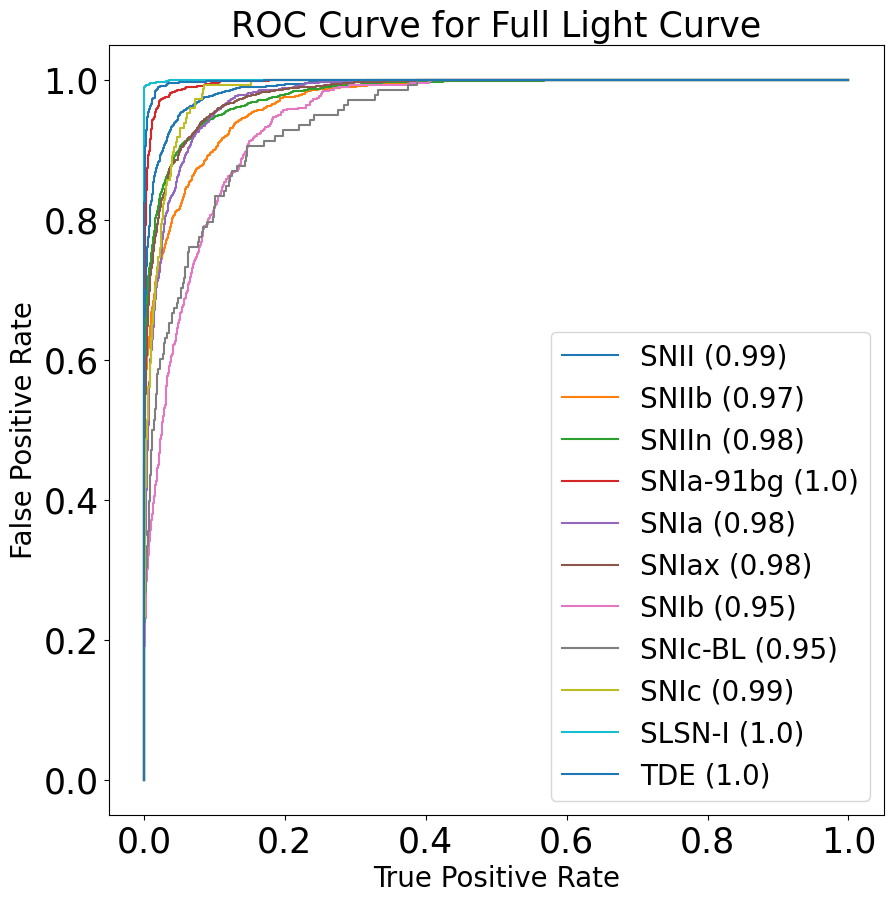

In [ ]:
# ROC Curve

from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

font = {'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(figsize=(10, 10))

auc = roc_auc_score(np.array(y_test), np.array(predictions), multi_class='ovr', average=None)

for i in range(len(non_anom_labels)):
  fpr, tpr, _ = roc_curve(y_true = single_test, y_score = predictions[:, i], pos_label = i)
  plt.plot(fpr, tpr, label = non_anom_labels[i] + f" ({round(auc[i], 2)})")

plt.legend(loc=0, fontsize=20)

plt.title("ROC Curve for Full Light Curve", fontsize=25)
plt.xlabel("True Positive Rate", fontsize=20)
plt.ylabel("False Positive Rate", fontsize=20)

plt.savefig("/content/drive/My Drive/plasticc_train_data/Figures/ClassificationROCCurve")

In [ ]:
def get_real_time_scores(test_lc, host_gal_lc):

    cur = []
    classification_scores = []

    host_gal = np.array([host_gal_lc])

    for i in test_lc:
        if (np.count_nonzero(i) == 0):
            break
        cur.append(i)
        lc = np.pad(cur, ((0, ntimesteps - len(cur)), (0, 0)))
        lc = np.array([lc])


        classification_scores.append(model.predict([lc, host_gal]))

    return classification_scores

In [ ]:
color = ['r', 'g', 'y', 'b', 'pink', 'orange', 'gray', 'k', 'm', 'c', 'brown']

def plot_real_time(classification_scores, lc):
    cur = np.array([(j[1] * 100) - 30 for j in lc])
    cur = cur[:len(classification_scores)]

    r_band = []
    rer = []
    r_cur = []
    g_band = []
    ger = []
    g_cur = []

    for i in lc[:len(classification_scores)]:
        if (i[0] < 0.5): # get different values for each passband
            r_band.append(i[2])
            rer.append(i[3])
            r_cur.append((i[1] * 100) - 30) # unscale

        else:
            g_band.append(i[2])
            ger.append(i[3])
            g_cur.append((i[1] * 100) - 30)




    fig, axs = plt.subplots(2, figsize=(8, 16))

    plt.subplots_adjust(wspace=0, hspace=0)

    axs[0].set_title(f"Real Time Classification Score for a {num_to_class[np.argmax(y_test[ind])]}", fontsize=25)


    axs[0].set_ylabel('Scaled Flux', fontsize=20)
    axs[0].errorbar(r_cur, r_band, yerr=rer, fmt='.')
    axs[0].errorbar(g_cur, g_band, yerr = ger, fmt = '.')


    axs[1].set_ylabel('Classification Score', fontsize=20)
    axs[1].set_xlabel('Time Since Trigger', fontsize=20)

    for class_ in range(y_test.shape[1]):
        classification_scores_class = np.array([i[0][class_] for i in classification_scores])

        axs[1].plot(cur, classification_scores_class, label=num_to_class[class_], c=color[class_])

    axs[1].legend(fontsize=18)
    plt.show()

    fig.savefig(f"/content/drive/My Drive/plasticc_train_data/Figures/{num_to_class[np.argmax(y_test[ind])]}Example")

In [ ]:
import random
font = {'size'   : 20}

matplotlib.rc('font', **font)
for i in range(15):
    ind = random.randint(1,1000)
    plot_real_time(get_real_time_scores(X_test[ind], host_gal_test[ind]), X_test[ind])